In [21]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [22]:
game_data = pd.read_csv('data/test2.csv')
game_data.shape

(67138, 30)

In [23]:
i = game_data[(game_data.AppID == 1200520)].index

game_data.drop(i[0], inplace=True)
game_data.shape

(67137, 30)

In [24]:
posRate = pd.DataFrame(game_data['Positive']) 
negRate = pd.DataFrame(game_data['Negative']) 
price = pd.DataFrame(game_data['Price']) 
rate_price = pd.DataFrame(game_data[["Positive", "Negative", "Price"]])

In [25]:
rate_price.describe().round(2)

,Positive,Negative,Price
count,67137.00,67137.00,67137.00
mean,1178.79,193.52,7.39
std,27335.44,5141.40,10.26
min,0.00,0.00,0.00
25%,2.00,0.00,0.99
50%,11.00,3.00,4.99
75%,66.00,20.00,9.99
max,5764420.00,895978.00,299.90


<AxesSubplot:>

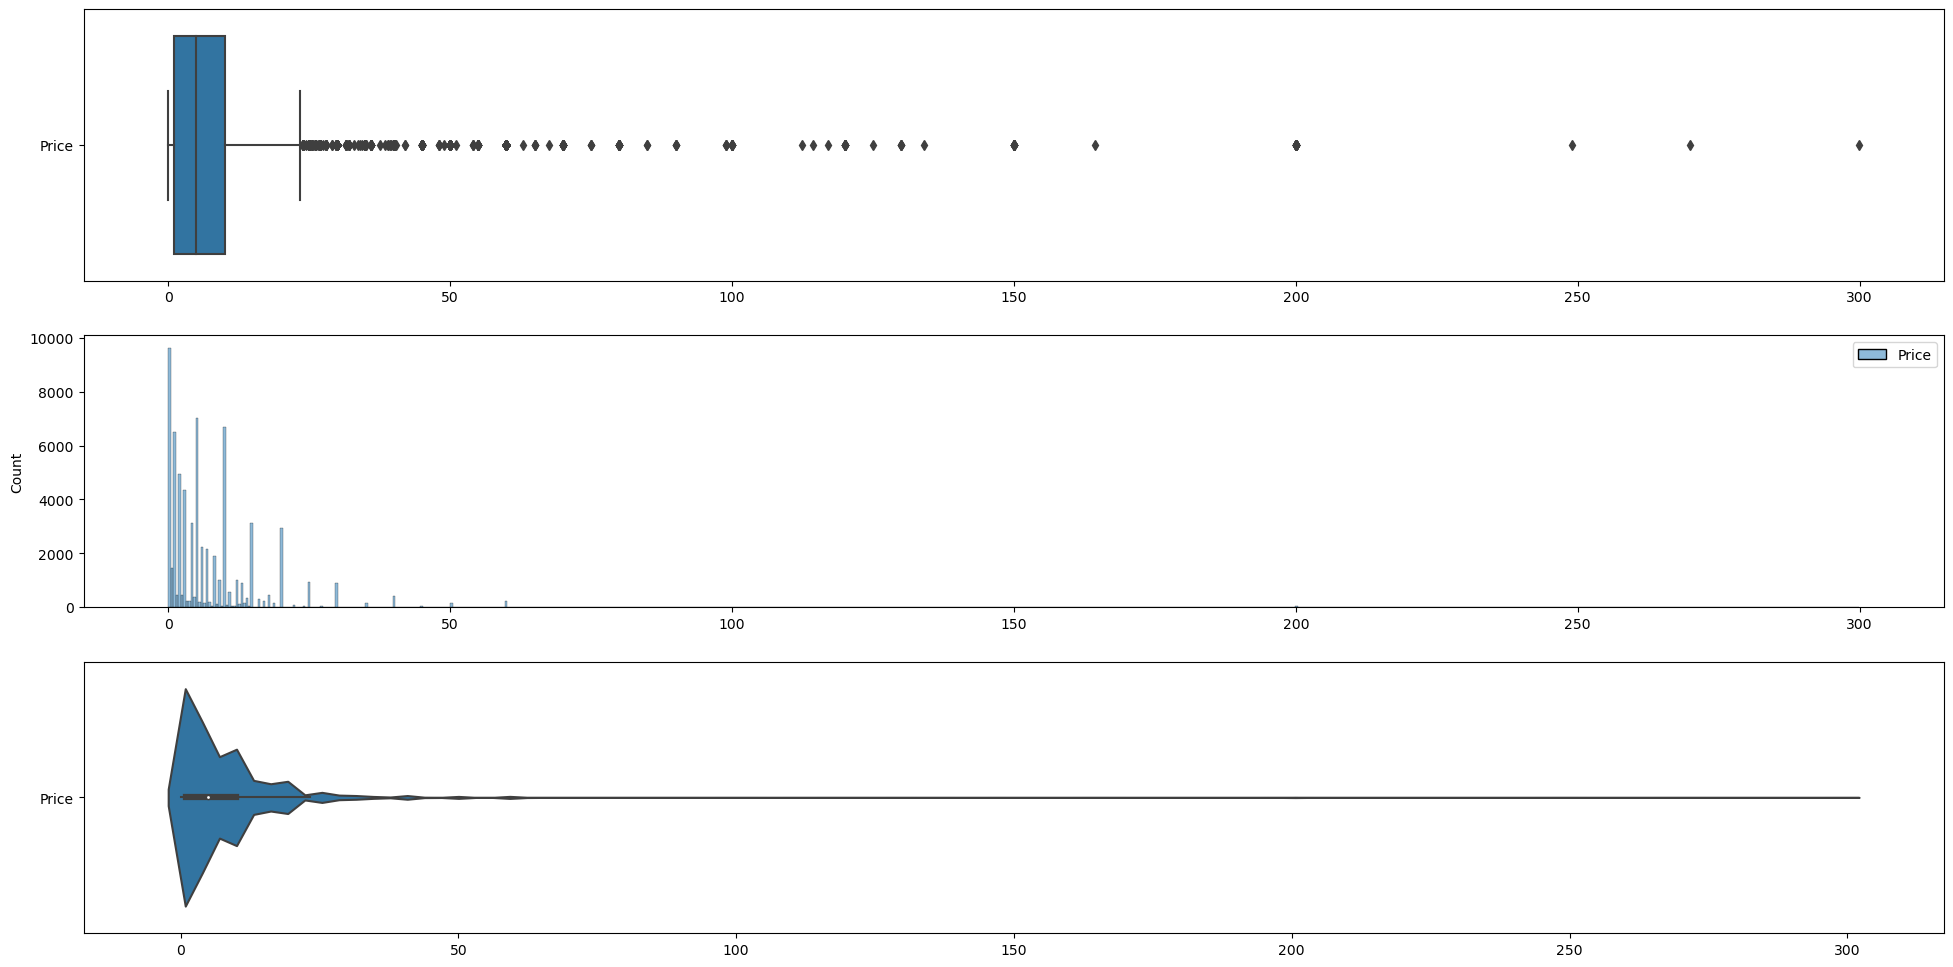

In [26]:
f, axes = plt.subplots(3, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = price, orient = "h", ax = axes[0])
sb.histplot(data = price, ax = axes[1])
sb.violinplot(data = price, orient = "h", ax = axes[2])

<AxesSubplot:>

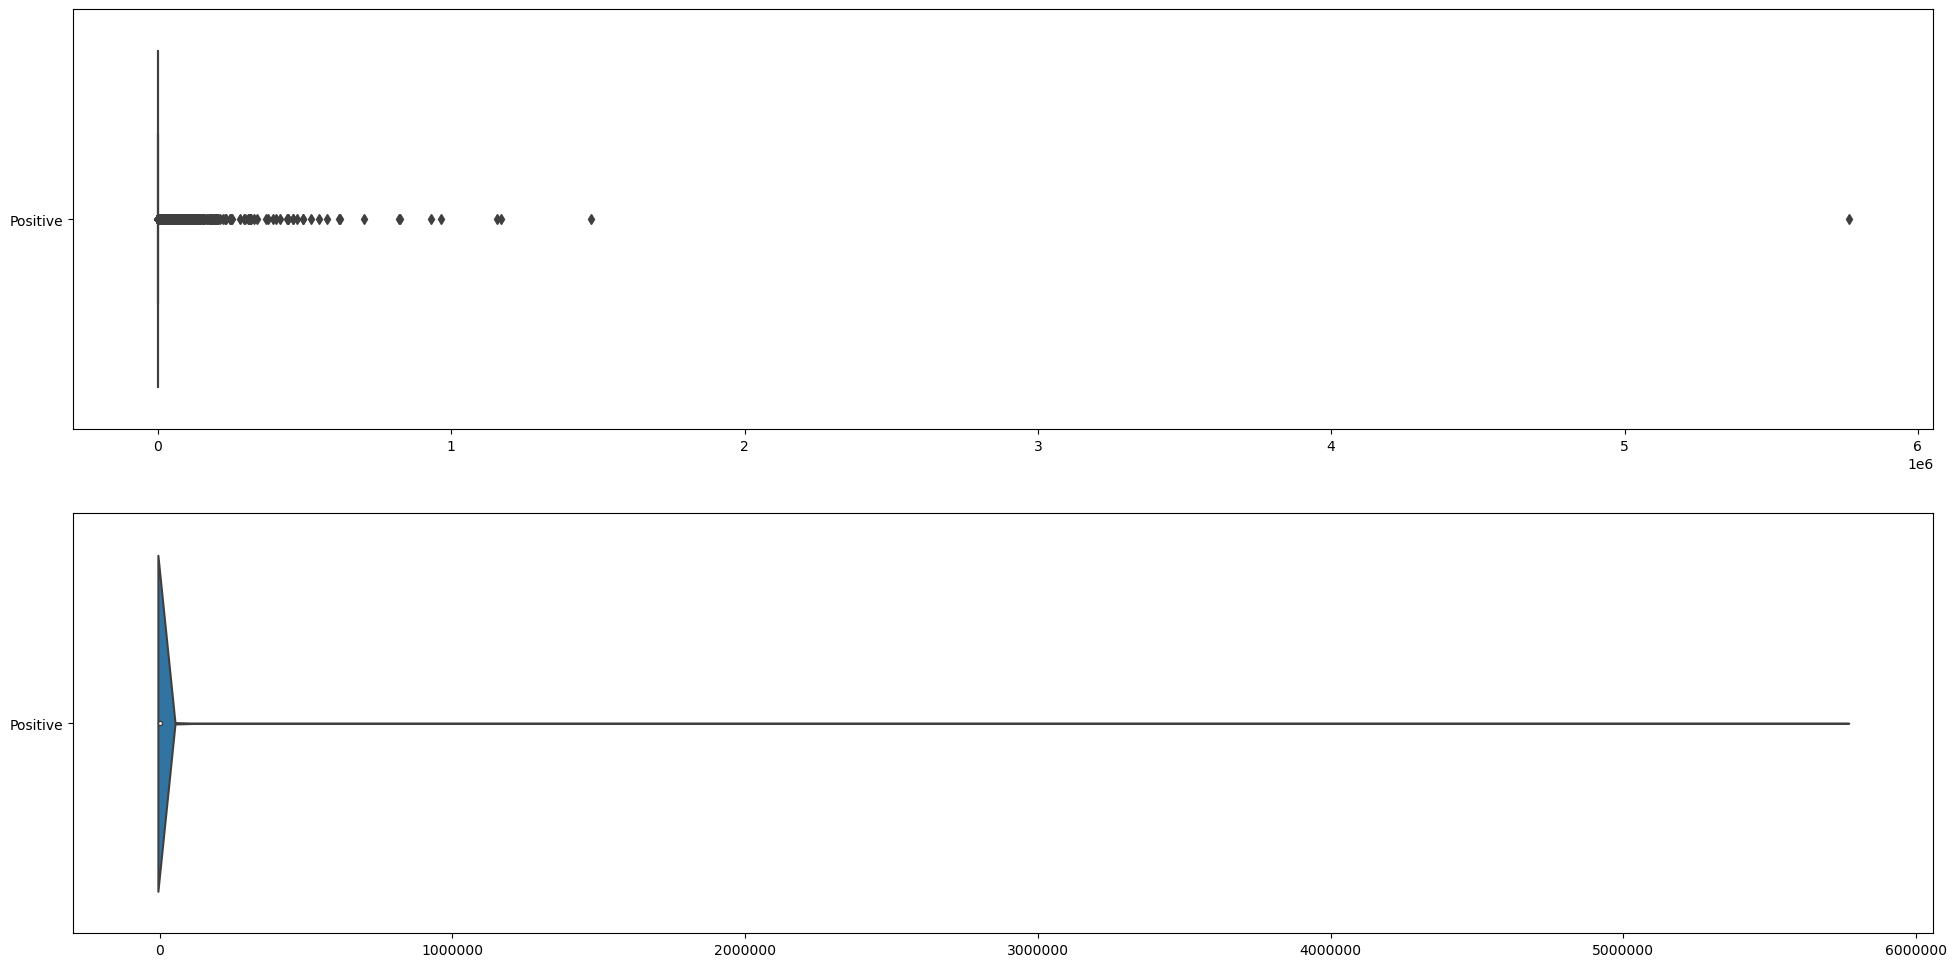

In [27]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = posRate, orient = "h", ax = axes[0])
# sb.histplot(data = posRate, ax = axes[1])
sb.violinplot(data = posRate, orient = "h", ax = axes[1])

<AxesSubplot:>

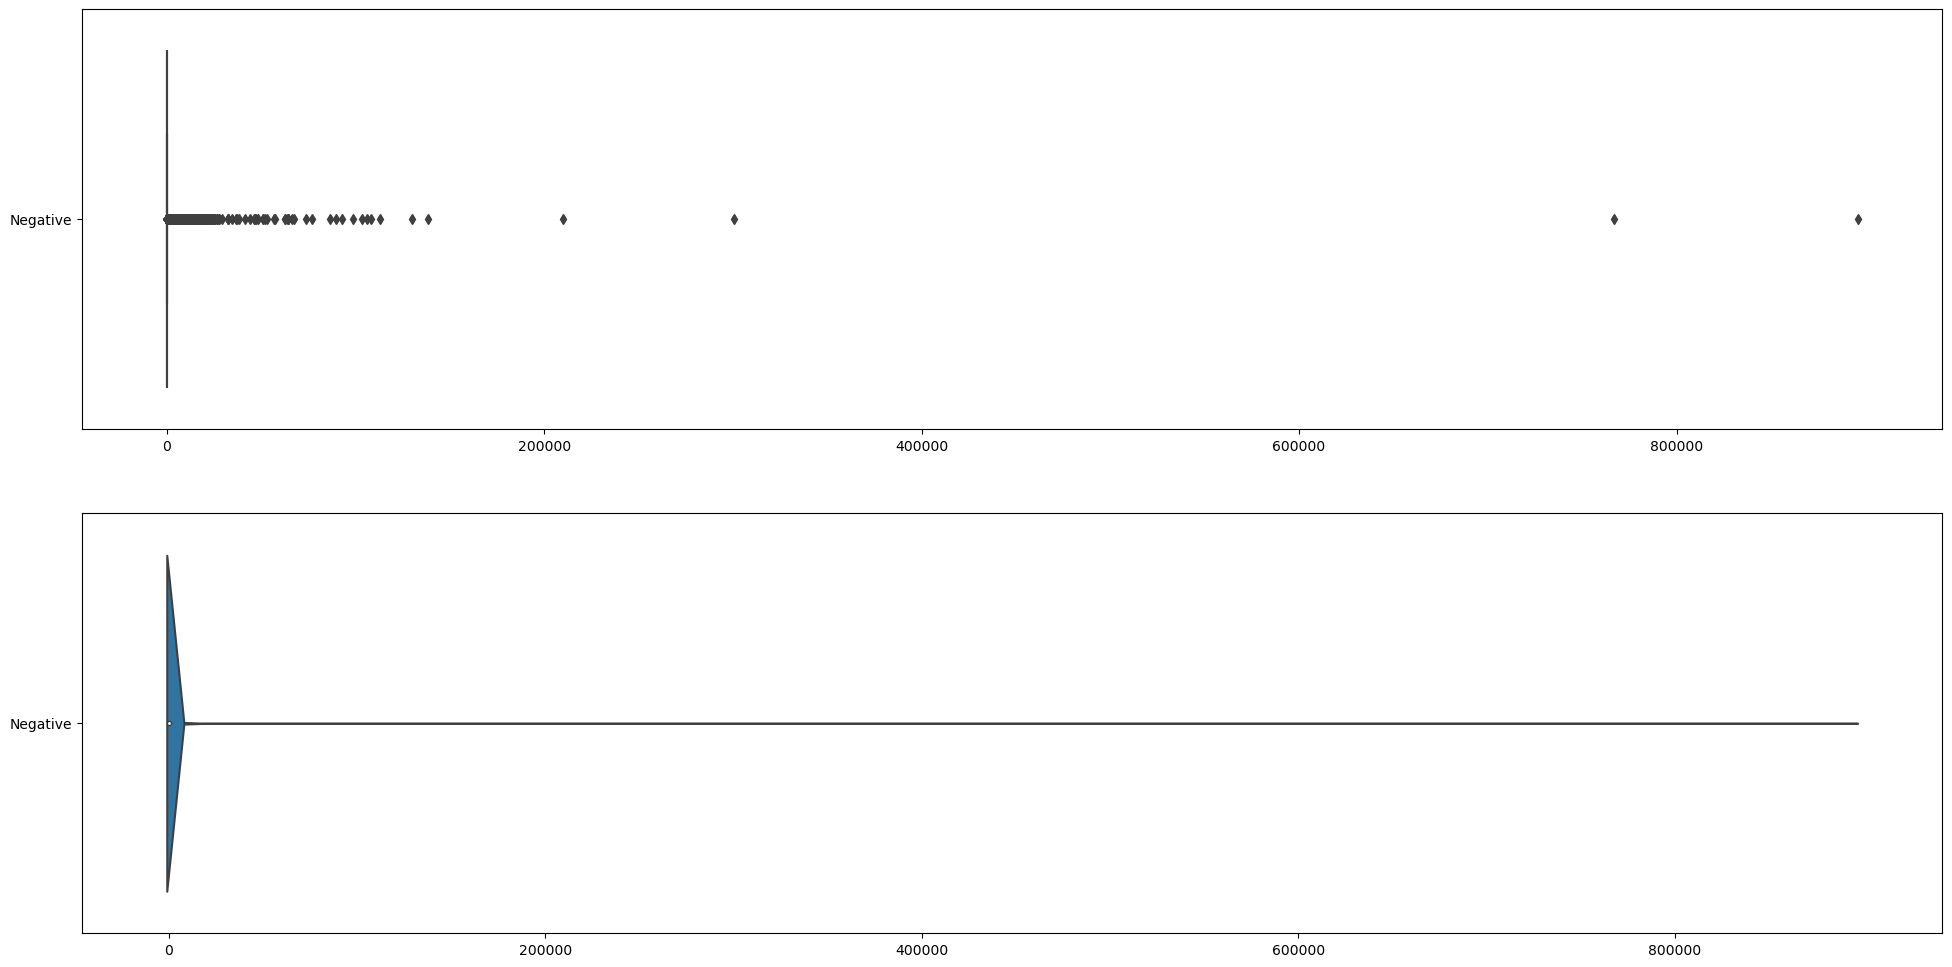

In [28]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = negRate, orient = "h", ax = axes[0])
# sb.histplot(data = negRate, ax = axes[1])
sb.violinplot(data = negRate, orient = "h", ax = axes[1])

In [32]:
a = cat_price.head(1)
json_table = []
cat_price_json = cat_price.to_json(orient='records')
cat_price_json = json.loads(cat_price_json)
hell = cat_price_json[0:1000]

for j in cat_price_json:
    test = {}
    cats = j["Categories"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if cats != None:
        cats = cats.split(",")
        for i in cats:
            test[i] = "T"
    # else:
    #     print(j)

    
    json_table.append(test)


print(len(json_table))

67137


In [33]:
# ref = pd.json_normalize(json_table)
cat_price_table = pd.DataFrame(json_table)
print(cat_price_table.shape)
print(cat_price_table.columns.tolist())
cat_price_table.fillna(value="F", inplace=True)

cat_price_table.head()

(67137, 42)
['Name', 'Price', 'Single-player', 'Multi-player', 'Steam Achievements', 'Partial Controller Support', 'Full controller support', 'Steam Leaderboards', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV', 'MMO', 'PvP', 'Online PvP', 'Co-op', 'Online Co-op', 'In-App Purchases', 'Steam Cloud', 'Steam Trading Cards', 'Shared/Split Screen', 'Cross-Platform Multiplayer', 'Remote Play Together', 'Stats', 'Shared/Split Screen PvP', 'Captions available', 'Steam Workshop', 'Includes level editor', 'LAN PvP', 'LAN Co-op', 'Shared/Split Screen Co-op', 'Steam Turn Notifications', 'VR Support', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled', 'Includes Source SDK', 'Commentary available', 'Mods (require HL2)', 'Mods', 'Tracked Motion Controller Support', 'Tracked Controller Support', 'VR Only', 'VR Supported']


,Name,Price,Single-player,Multi-player,Steam Achievements,Partial Controller Support,Full controller support,Steam Leaderboards,Remote Play on Phone,Remote Play on Tablet,...,SteamVR Collectibles,Valve Anti-Cheat enabled,Includes Source SDK,Commentary available,Mods (require HL2),Mods,Tracked Motion Controller Support,Tracked Controller Support,VR Only,VR Supported
0,Galactic Bowling,19.99,T,T,T,T,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
1,Train Bandit,0.99,T,F,T,F,T,T,T,T,...,F,F,F,F,F,F,F,F,F,F
2,Jolt Project,4.99,T,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
3,Henosis™,5.99,T,F,F,F,T,F,F,F,...,F,F,F,F,F,F,F,F,F,F
4,Two Weeks in Painland,0.00,T,F,T,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F


<Figure size 2400x1800 with 0 Axes>

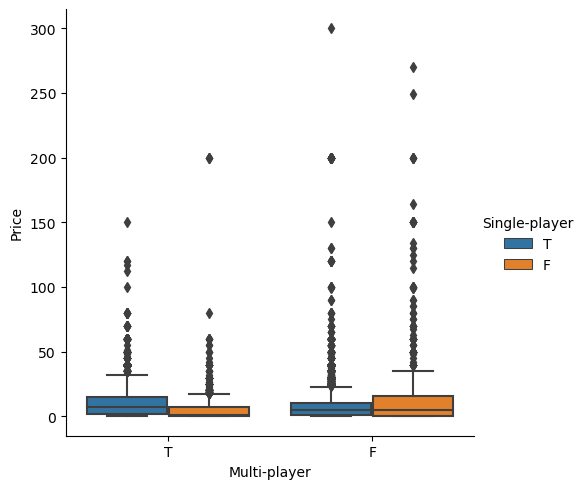

In [34]:
f = plt.figure(figsize=(24, 18))
price_sp = pd.DataFrame(cat_price_table[["Price", "Multi-player", "Single-player"]])
# sb.boxplot(x = "Price", y = "Multi-player", data = price_sp, orient = "h")
sb.catplot(data=price_sp, x="Multi-player", y="Price", hue="Single-player", kind="box")